# Assignment 1: Part 1 - kNN Basics
In this assignment you will implement a kNN model from scratch. The objectives are:
- To familiarise yourself with Python and some aspects of Numpy if you are not accustomed to it
- To gain some hands-on experience with a simple machine learning model
- Classify a set of test data


In [90]:
import numpy as np
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data exploration
We can use sklearn to generate random data. For now we will classify data with two input features that may belong to one of two classes.
The full dataset is split 50/50 into a training and test set.
For now we will not do any pre-processing on the data.

At a later stage we will look at real-world datasets and some of the problems that might be experienced with real-world data.

In [542]:
X, Y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_classes=2, n_clusters_per_class=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

It is very useful to know the shape of the data you are working with. Very often it serves as a quick way to debug parts of your code. If you are working with Python lists you can use the `len()` function, but you would have to use it for each dimension of your data. e.g.\
`dim1 = len(my_list)` ,
`dim2 = len(my_list[0])` ,
`dim3 = len(my_list([0][0])`\
Numpy provides easy access to the shape of n-dimensional arrays `ndarrays` e.g. \
`my_array.shape => (dim1, dim2, dim3)` \
You will notice that I have provided clues about the shape of the data for each function where necessary.

You can use the cell block below to examine the data however you wish. It will not be graded. I suggest confirming that the data shapes make sense. For example the data matix $\mathbf{X}$ would be given by
\begin{align}
\mathbf{X} &= \begin{bmatrix}
			\mathbf{x_1}^T \\
			\mathbf{x_2}^T \\
			\vdots \\
			\mathbf{x_n}^T
		\end{bmatrix}
		=
		\begin{bmatrix}
			x_{1}^{[1]} & x_{2}^{[1]}  & \dots  & x_{m}^{[1]} \\
			x_{1}^{[2]} & x_{2}^{[2]}  & \dots  & x_{m}^{[2]} \\
			\vdots & \vdots & \ddots & \vdots \\
			x_{1}^{[n]} & x_{2}^{[n]}  & \dots  & x_{m}^{[n]}
		\end{bmatrix}
\end{align}
Where there are $n$ number of examples and $m$ number of features

Y Shape: (500,)

X Shape: (500, 2)



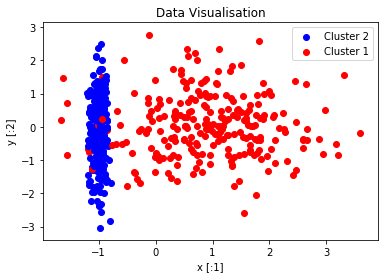

In [543]:
# You can use this block to play around. 
# Just make sure not to change the generated data as these are global variables.
# You can re-run the data generating block to create new data

# Visualise data dimensions
print("Y Shape: {}\n".format(Y.shape))
print("X Shape: {}\n".format(X.shape))

# Visualize data
fig = plt.figure()
for i in range(Y.size):
    if Y[i]==1:
        plt.scatter(X[i,[0]],X[i,[1]],color='r',label='Cluster 1')
    else:
        plt.scatter(X[i,[0]],X[i,[1]],color='b',label='Cluster 2')

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Data Visualisation')
plt.xlabel('x [:1]')
plt.ylabel('y [:2]')
plt.show()

# Data Visualisation
It's useful to visualise the data. Here it is easy because we only have two features. High-dimensional inputs need additional tools in order to help visualise them. 

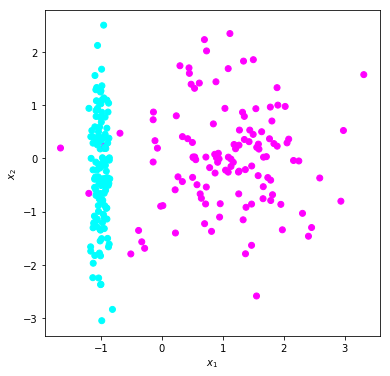

In [545]:
fig = plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='cool')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.show()

In [546]:
# You can use this block play around 

# Task 1: Distance Function
Your first task is to develop a function that takes in two feature vectors (numpy arrays), $\mathbf{x}^{[a]}$, and $\mathbf{x}^{[b]}$ and ouputs the Euclidean distance between them

$$
d\left(\mathbf{x}^{[a]}, \mathbf{x}^{[b]}\right) = \sqrt{\sum\limits_{j=1}^m\left(x_j^{[a]} - x_j^{[b]}\right)^2}
$$

Some helpful functions:\
`np.sqrt()`, `np.sum()` and `np.pow()`

In [547]:
def euclideanDistance(x_a, x_b):
    """
    Calculates the Euclidean distance between two vectors
    
    Arguments:
        x_a (array): shape [n_features, ] a single vector a
        x_b (array): shape [n_features, ] a single vector b
    
    Returns:
        distance (float): distance between vectors x_a and x_b
    """
    
    distance=0
    
    for i, j in enumerate(x_a):
        distance+=(x_a[i]-x_b[i])**2
    distance=np.sqrt(distance)
    return distance

In [548]:
# Free cell

In [549]:
# The following tests are visible to you
x1_grade = np.array((-1.0, 2.0))
x2_grade = np.array((2.5, -2.0))
assert euclideanDistance(x1_grade, x2_grade) == 5.315072906367325

x1_grade = np.array((1.0, -1.0, 0))
x2_grade = np.array((-2.0, 2.6, 1.8))
assert euclideanDistance(x1_grade, x2_grade) == 5.019960159204453


# Task 2: Calculate list of distances
For the kNN algorithm you need to generate the distances between a single test example and all possible training examples.To do this you will need to write a function that takes in a test example and a list of examples, calculates the distance between the test example and each of the other example, and outputs a list of distances. The distances should be in the correct order as they correspond to a specific training example. To give you an idea what the output should be:

$$
\mathcal{distance\_list} = \left[d\left(\mathbf{x}^{[t]}, \mathbf{x}^{[1]}\right), \ldots, d\left(\mathbf{x}^{[t]}, \mathbf{x}^{[n]}\right)\right]
$$

where $d\left(\mathbf{x}^{[t]}, \mathbf{x}^{[1]}\right)$ is the distance function from task 1

The distances must be stored in a Python list, not a numpy array.

Some helpful functions:\
Python's built-in `append()` function

In [550]:
def calculateDistances(x_test, X_in):
    """
    Calculates the distance between a single test example, x_test,
    and a list of examples X_in. 
    
    Args:
        x_test (array): shape [n_features,] a single test example
        X_in (array): shape [n_samples, n_features] a list of examples to compare against.
    
    Returns:
        distance_list (list of float): The list containing the distances       
    """
    
    distance_list = []
    for i, array in enumerate(X_in):

        distance=0
        for j, value in enumerate(array):
            distance+=(x_test[j]-value)**2

        distance=np.sqrt(distance)
        distance_list.append(distance)

    return distance_list

In [551]:
# Free cell

In [552]:
# The following tests are visible to you
x1_grade = np.array((1.0, -1.0))
x2_grade = np.array([(2.0, -1.0),
              (-1.5, 2.5),
              (-2, -2),
              (0, 0)])

assert calculateDistances(x1_grade, x2_grade) == [1.0, 4.301162633521313, 3.1622776601683795, 1.4142135623730951]


# Task 3: Determine k Nearest Neighbours
This task is broken into subtasks that will create a set of the k nearest neighbours to a single test example.
$$
\mathcal{D}_k = \{(\mathbf{x}^{[i]}, \mathbf{y}^{[i]}), \ldots, (\mathbf{x}^{[k]}, \mathbf{y}^{[k]})\}
$$
## Task 3.1 Sorting the distances and returning indices 
To find the k nearest neighbours you first need to sort the list of distances in ascending order. For a naive kNN we don't care about the actual distances, so we only need to know which examples are responsible for the k smallest distances. We can do this by sorting the list of distances while keeping track of the corresponding indices so that we can pull the examples from the original training data at those indices. 

Your function must return a numpy array (it will make indexing the original dataset easier compared to python lists)

Some helpful functions:\
`np.argsort()`

In [553]:
def kNearestIndices(distance_list, k):
    """
    Determines the indices of the k nearest neighbours
    
    Arguments:
        distance_list (list of float): list of distances between a test point 
            and every training example
        k (int): the number of nearest neighbours to consider
    
    Returns:
        k_nearest_indices (array of int): shape [k,] array of the indices 
            corresponding to the k nearest neighbours
    """
    k_nearest_indices=np.zeros(k,dtype=int)
    for i in range(k):
        if len(distance_list)<1: return k_nearest_indices # error protection

        distance=float("inf")
        index=0

        for j,value in enumerate(distance_list):
            if value<distance and value!=-1:
                index=j
                distance=value
        
        distance_list[index]=-1
        k_nearest_indices[i]=index

    return k_nearest_indices

In [554]:
# Free cell

In [555]:
# The following tests are visible to you
distance_list_grade = [5.0, 3.5, 2.5, 1.0]
k_grade = 3
assert kNearestIndices(distance_list_grade, k_grade).tolist() == [3, 2, 1]

distance_list_grade = [5.0, 3.0, 3.5, 1.0, 10.0]
k_grade = 4
assert kNearestIndices(distance_list_grade, k_grade).tolist() == [3, 1, 2, 0]



## Task 3.2: Create $\mathcal{D}_k$
Now write a function that samples the original training set to produce the set of k nearest neighbours. 
For now the function should return the `X_k` and `Y_k` data matrices seperately as indicated.

In [556]:
def kNearestNeighbours(k_nearest_indices, X_in, Y_in):
    """
    Creates the dataset of k nearest neighbours
    
    Arguments:
        k_nearest_indices (array of int): shape [k,] array of the indices 
            corresponding to the k nearest neighbours
        X_in (array): shape [n_examples, n_features] the example data matrix to sample from
        Y_in (array): shape [n_examples, ] the label data matrix to sample from
    
    Returns:
        X_k (array): shape [k, n_features] the k nearest examples
        Y_k (array): shape [k, ] the labels corresponding to the k nearest examples
    """
    X_k = X_in[k_nearest_indices]     
    Y_k =Y_in[k_nearest_indices]    

    return X_k, Y_k

In [557]:
# Free cell

In [558]:
# The following tests are visible to you

# dummy dataset for autograding purposes
X_train_grade = np.array([[1, 1],
                       [0, 2],
                       [1, 2],
                       [2, 2],
                       [10, 10],
                       [5, 10],
                       [6, 6],
                       [2, 3]])
Y_train_grade = np.array([0, 0, 0, 0, 1, 1, 1, 0])

X_k_grade, Y_k_grade = kNearestNeighbours([0, 1, 3], X_train_grade, Y_train_grade)
assert  np.equal(X_k_grade, np.array([[1, 1],[0, 2],[2, 2]])).all()
assert  np.equal(Y_k_grade, np.array([0, 0, 0])).all()


# Task 4: Predict Class
You can now write a function to predict the class of a test example by choosing the class the appears most frequently in ground truth labels for the k nearest neighbours i.e. the mode.
$$
h(\mathbf{x}^{[t]}) = mode(\{y^{[i]}, \ldots, y^{[k]}\})
$$

Some helpful functions:\
`mode()` function from scipy. 

In [559]:
from scipy.stats import mode
def predict(x_test, X_in, Y_in, k):
    """
    Predicts the class of a single test example
    
    Arguments:
        x_test (array): shape [n_features, ] the test example to classify
        X_in (array): shape [n_input_examples, n_features] the example data matrix to sample from
        Y_in (array): shape [n_input_labels, ] the label data matrix to sample from
    
    Returns:
        prediction (array): shape [1,] the number corresponding to the class 
    """
      
    # n = X_in.shape[1]
    # X_k=np.arange(n*len(k_nearest_indices)).reshape(k,n)
    # Y_k=np.arange(k)

    # for i,index in enumerate(k_nearest_indices):
    #     print(index)
    #     distances=calculateDistances(X_in[index],X_in)
    #     kNearestIndices(distances,k-2)
    #     X_k[i]=X_in[index]
    #     Y_k[i]=Y_in[index]
    #     print(kNearestIndices)


    distances=calculateDistances(x_test,X_in)
    indexs = kNearestIndices(distances,k)
    prediction=mode(Y_in[indexs])[0]

    return prediction

In [560]:
# Free cell

In [561]:
# The following tests are visible to you

# dummy dataset for autograding purposes
X_train_grade = np.array([[1, 1],
                       [0, 2],
                       [2, 1],
                       [1, 3],
                       [10, 10],
                       [5, 10],
                       [6, 8],
                       [2, 3]])
Y_train_grade = np.array([0, 0, 0, 0, 1, 1, 1, 0])

x1_grade = np.array([1, 2])
k_grade = 3
assert predict(x1_grade, X_train_grade, Y_train_grade, k_grade) == 0

x1_grade = np.array([6, 9])
k_grade = 2
assert predict(x1_grade, X_train_grade, Y_train_grade, k_grade) == 1


# Task 5: Predict for an entire batch of test examples
After you can successfully classify a single test example you need to repeat this across an entire batch of examples so we can apply performance metrics to assess the model.
\begin{align}
\hat{\mathbf{Y}}(\mathbf{X}_{test}) &= \{h(\mathbf{x}_{test}^{[i]}), \ldots, h(\mathbf{x}_{test}^{[j]})\} \\
&= \{\hat{y}^{[1]}, \ldots, \hat{y}^{[j]}\}
\end{align}

Sklearn and many other machine learning libraries will provide the data in terms of numpy arrays or similar (i.e. the tensors are commonly used by libraries such as tensorflow and pytorch and in most cases will work similarly to numpy arrays). If you take a slice of label data for example: \
Slicing the first 3 labels from Y, `Y[:3] => array([0, 1, 1])`. The shape of this would be (n_train_labels, ) *more generally (n_train_labels, n_output_features) if your output is a vector. If you had a python list it would appear as `Y[:3] => [0, 1, 1]`

You want to make sure that a batch of predicted outputs from your model matches the same form as a batch of labels for when you start making calculations such as accuracy. e.g, you want `y_hat.shape => (n_test_labels,)` to have the same shape as the lables `y.shape => (n_test_labels,)`. 

Most libraries will have this as part of how they create their models, but when building your own algorithms you may have intermediate steps that do not produce it exactly like this. These kinds of errors regarding data shape and dimensions pop up very often in practise. 

Some helpful functions:\
To combine multiple arrays: `np.concatenate()` *beware of axis when concatenating or for convenience `np.vstack()`
To change the shape of an array: `ndarray.reshape(shape)` or sometimes conventiently `ndarray.flatten()`

In [562]:
def predictBatch(X_t, X_in, Y_in, k):
    """
    Performs predictions over a batch of test examples
    
    Arguments:
        X_t (array): shape [n_test_examples, n_features]
        X_in (array): shape [n_input_examples, n_features]
        Y_in (array): shape [n_input_labels, ]
        k (int): number of nearest neighbours to consider
    
    Returns:
        predictions (array): shape [n_test_examples,] the array of predictions
        
    """
    predictions=np.zeros(X_t.shape[0])
    for i,value in enumerate(X_t):
        pred = predict(value, X_in, Y_in, k)
        predictions[i]=pred
    return predictions

In [563]:
# free cell

In [564]:
# The following tests are visible to you
# dummy dataset for grading purposes
X_train_grade = np.array([[1, 1],
                       [0, 2],
                       [2, 1],
                       [1, 3],
                       [10, 10],
                       [5, 10],
                       [6, 8],
                       [2, 3]])
Y_train_grade = np.array([0, 0, 0, 0, 1, 1, 1, 0])

X_test_grade = np.array([[0, 0],
                [0, 1],
                [6, 10],
                [9, 8]])
Y_test_grade = np.array([0, 0, 1, 1])
k_grade=1
assert np.equal(predictBatch(X_test_grade, X_train_grade, Y_train_grade, k=k_grade), Y_test_grade).all()

# Task 6: Accuracy metric
In this task you will create a function to measure the overall accuracy of your model. 
$$
ACC = \frac{\# correct predictions}{\# total examples}
$$

In [565]:
def accuracy(Y_pred, Y_test):
    """
    Calculates the accuracy of the model 
    
    Arguments:
        Y_pred (array): shape [n_test_examples,] an array of model predictions
        Y_test (array): shape [n_test_labels,] an array of test labels to 
            evaluate the predictions against
    
    Returns:
        accuracy (float): the accuracy of the model
    """
    # YOUR CODE HERE
    correct=0
    for i,value in enumerate(Y_test):
        if Y_pred[i]==value:
            correct+=1
    accuracy=float(correct)/float(Y_test.size)
    
    return accuracy
    

In [566]:
# Free cell

In [567]:
# The following tests are visible to you

Y_test_grade = np.array([0, 1, 0, 0])
Y_pred_grade = np.array([0, 1, 1, 0])

assert accuracy(Y_pred_grade, Y_test_grade) == 0.75

Y_pred_grade = np.array([1, 0, 0, 0])
assert accuracy(Y_pred_grade, Y_test_grade) == 0.5


# Task 7: Test your model
Now you can combine the rest of the functions you've built into on function run your model with the generated training and test to data evaluate your model. This is really just to make running multiple tests more convenient.   

In [568]:
def run(X_train, X_test, Y_train, Y_test, k):
    """
    Evaluates the model on the test data
    
    Arguments:
        X_train (array): shape [n_train_examples, n_features]
        X_test (array): shape [n_test_examples, n_features]
        Y_train (array): shape [n_train_examples, ]
        Y_test (array): shape [n_test_examples, ]
        k (int): number of nearest neighbours to consider
    
    Returns:
        test_accuracy (float): the final accuracy of your model 
    """

    Y_pred = predictBatch(X_test, X_train, Y_train, k)
    test_accuracy = accuracy(Y_pred,Y_test)
    
    return test_accuracy

In [572]:
# Free cell

print(run(X_train,X_test,Y_train,Y_test,1))

0.936


In [536]:
# I can't show you an example test because it would give away the answer

# End of Part 1
That concludes this part of assignment 1. 